# TITANIC SURVIED PROJECT

import the neccesory libraries/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

load the dataset 

In [2]:
df=pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [4]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


describe the data and understand the features

In [5]:
df.shape

(891, 9)

In [6]:
df.size

8019

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df['Age'].isnull().sum()

177

In [11]:
# replace missing value with mean data 
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df['Age'] = np.ceil(df['Age'])

In [13]:
df['Age'].isnull().sum()

0

In [14]:
# categorical data ..not in numbers
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [16]:
df['Embarked'].isnull().sum()

0

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [19]:
df['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0


# data visualization

In [20]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

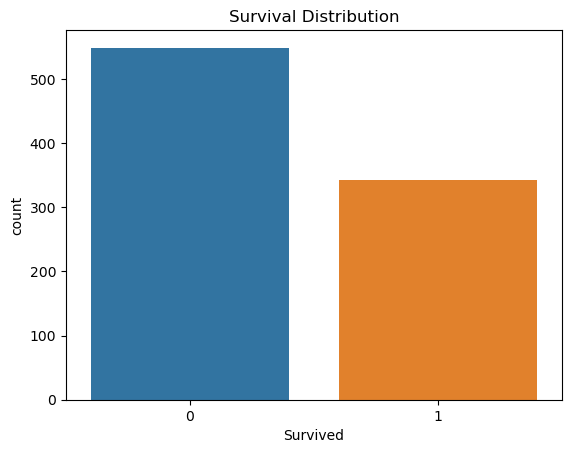

In [21]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

In [22]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

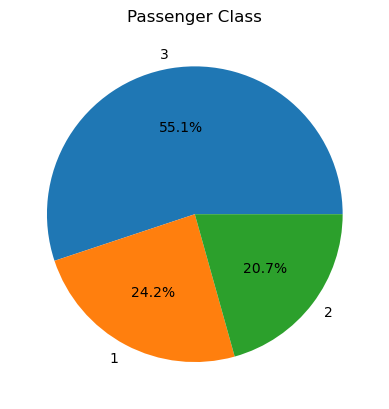

In [23]:
plt.pie(df['Pclass'].value_counts(), labels=df['Pclass'].unique(), autopct='%1.1f%%')
plt.title('Passenger Class')
plt.show()

In [24]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
df['Sex'].replace({'male':1,'female':0},inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0


In [26]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

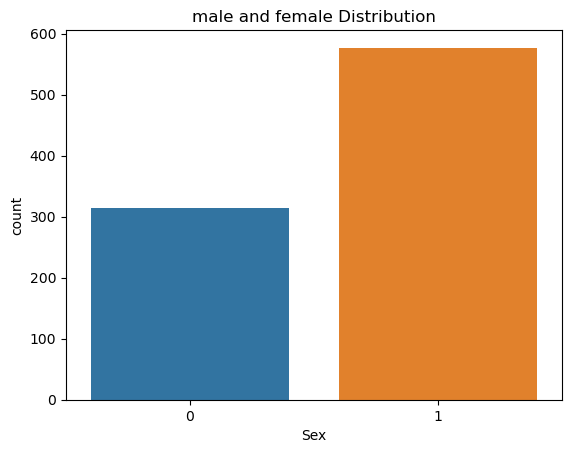

In [27]:
sns.countplot(x='Sex', data=df)
plt.title('male and female Distribution')
plt.show()

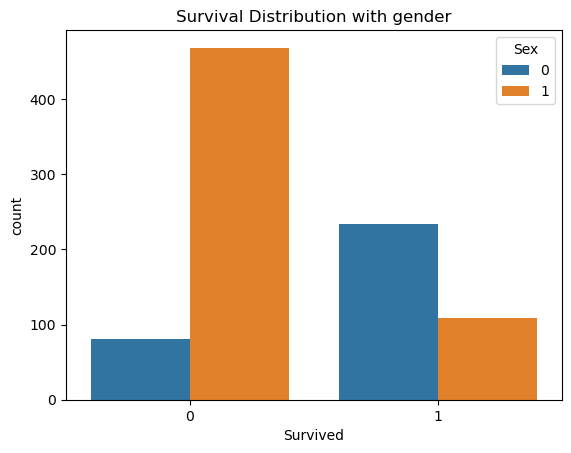

In [28]:
sns.countplot(x='Survived',hue='Sex', data=df)
plt.title('Survival Distribution with gender')
plt.show()

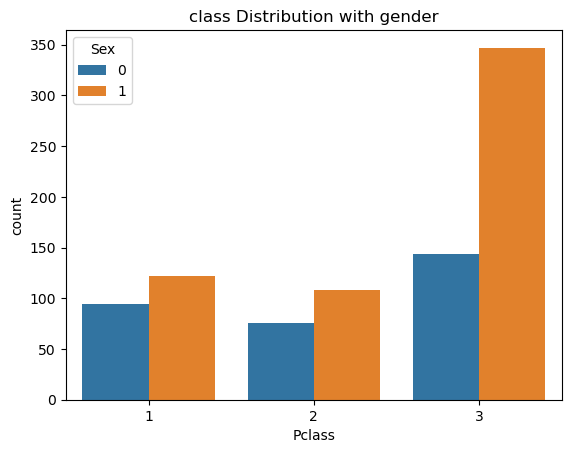

In [29]:
sns.countplot(x='Pclass',hue='Sex', data=df)
plt.title('class Distribution with gender')
plt.show()

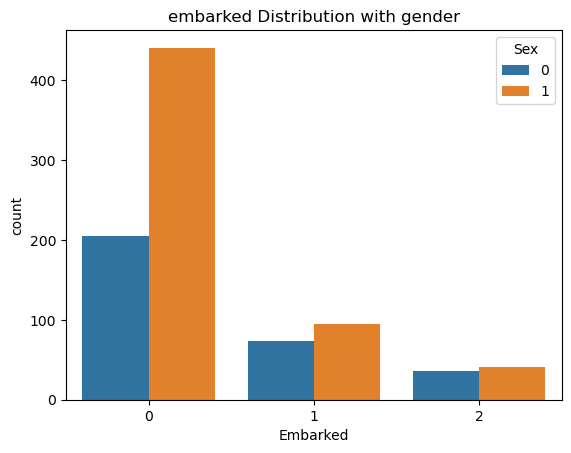

In [30]:
sns.countplot(x='Embarked',hue='Sex', data=df)
plt.title('embarked Distribution with gender')
plt.show()

In [31]:
max(df['Fare'])

512.3292

In [32]:
df['Fare'].min()

0.0

In [33]:
df[df.Fare==max(df['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,"Ward, Miss. Anna",0,35.0,0,0,512.3292,1
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,512.3292,1
737,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,512.3292,1


In [34]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0


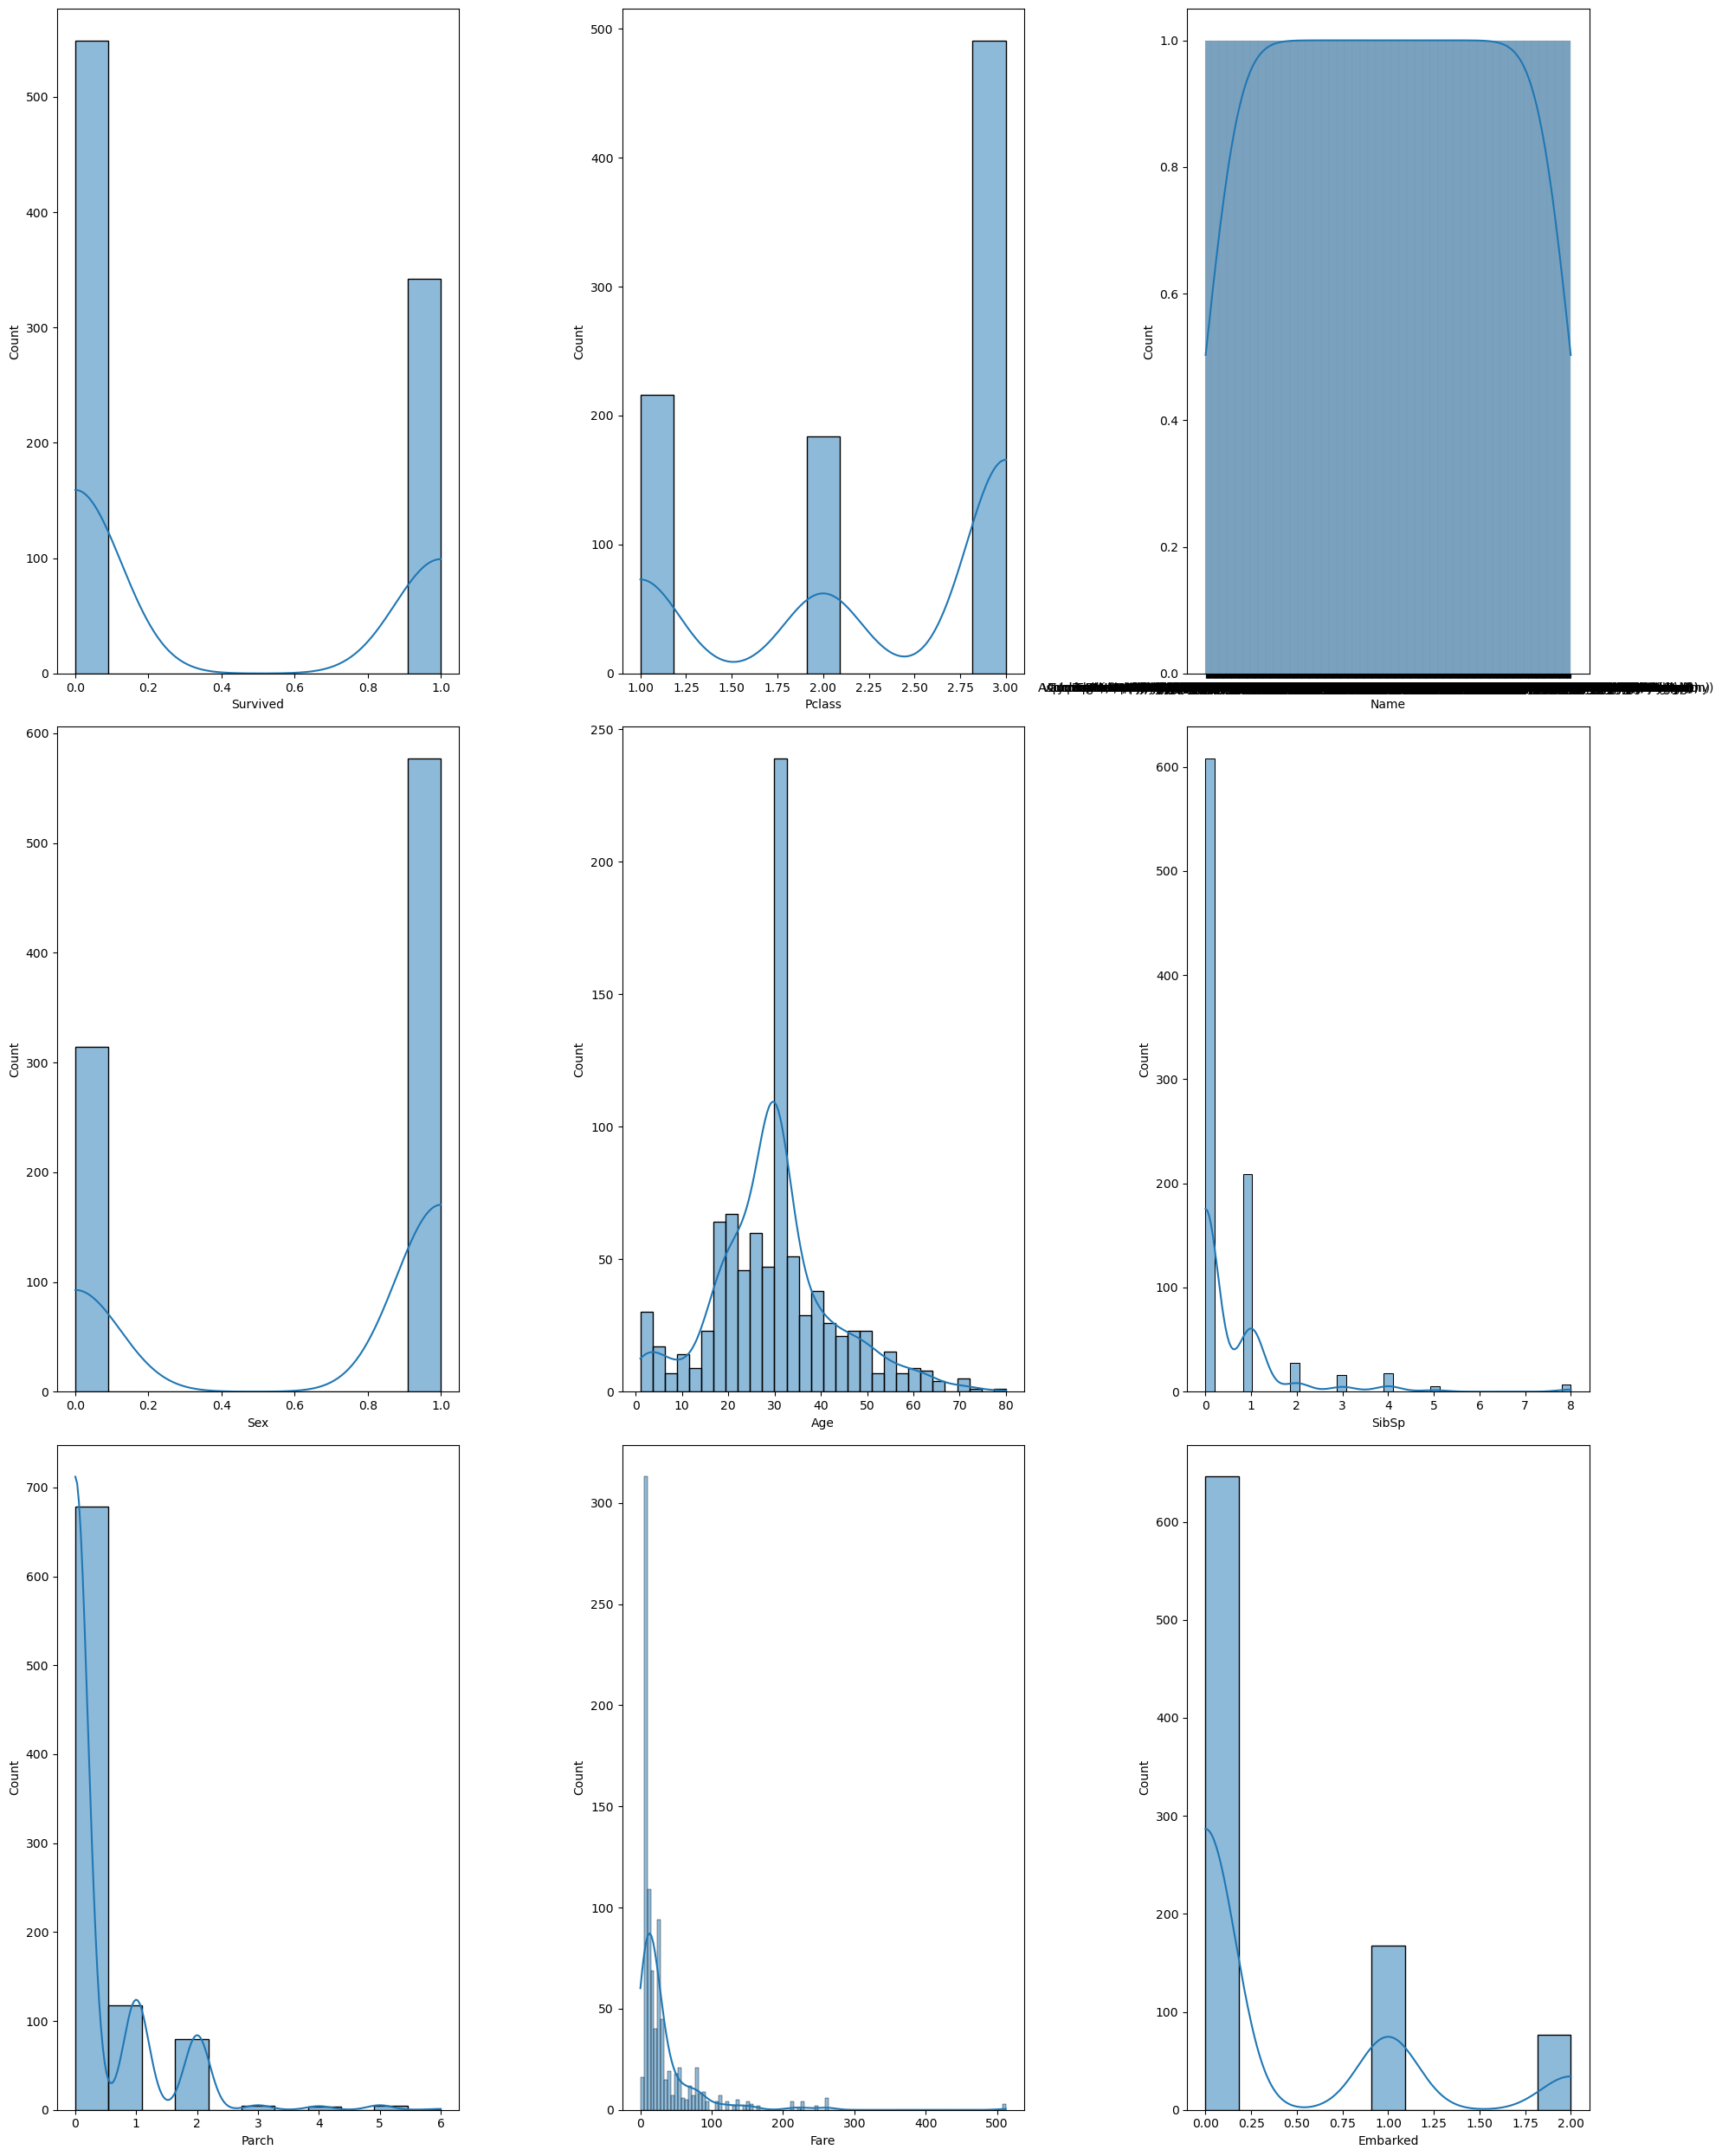

In [35]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(3,3, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show() 

In [36]:
x=df.drop(columns=['Name','Survived'],axis=1)
y=df['Survived']

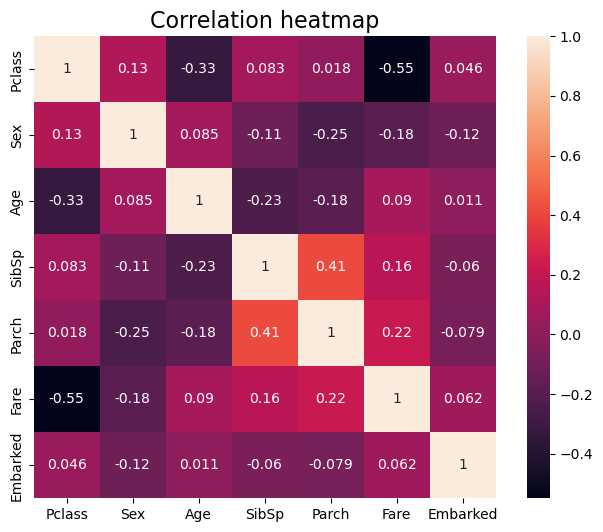

In [37]:
corr_mat = x.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, square=True)
plt.title("Correlation heatmap", size=16)

plt.show()

The plot shows that only a few features seem to correlate with eachother which means that most columns carry some unique information.
So have a look at the individual features by grouping the age also


In [38]:
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90']
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 100, 10), labels=age_groups)

age_survival = df.groupby('AgeGroup')['Survived'].agg([ 'count', 'sum'])
age_survival = age_survival.reindex(age_groups)

age_survival.columns = [ 'Total', 'Survived']

age_survival['Died'] = age_survival['Total'] - age_survival['Survived']

age_survival


,Total,Survived,Died
AgeGroup,,,
1-10,64,38,26
11-20,115,44,71
21-30,407,136,271
31-40,155,69,86
41-50,86,33,53
51-60,42,17,25
61-70,17,4,13
71-80,5,1,4
81-90,0,0,0


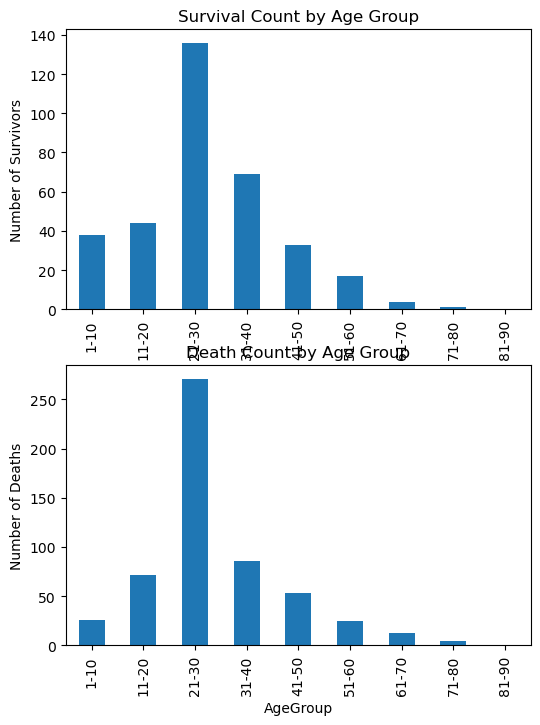

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))
age_survival['Survived'].plot(kind='bar',ax=ax1)
ax1.set_ylabel('Number of Survivors')
ax1.set_title('Survival Count by Age Group')

age_survival['Died'].plot(kind='bar',ax=ax2)
ax2.set_ylabel('Number of Deaths')
ax2.set_title('Death Count by Age Group')

plt.show()


In [40]:
data=df.drop(columns=['Name','AgeGroup'],axis=1)
data.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,0


In [41]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.422911
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [70]:
data['Fare']=np.cbrt(data['Fare'])

In [71]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.422911
SibSp       3.695352
Parch       2.749117
Fare       -2.950107
Embarked    1.543397
dtype: float64

In [44]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.070982,-0.035322,0.081629,0.322398,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.329300,0.083081,0.018443,-0.656224,0.045702
Sex,-0.543351,0.131900,1.000000,0.084989,-0.114631,-0.245489,-0.251434,-0.116569
Age,-0.070982,-0.329300,0.084989,1.000000,-0.232683,-0.180337,0.103381,0.010838
SibSp,-0.035322,0.083081,-0.114631,-0.232683,1.000000,0.414838,0.283371,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.180337,0.414838,1.000000,0.307687,-0.078665
Fare,0.322398,-0.656224,-0.251434,0.103381,0.283371,0.307687,1.000000,0.036869
Embarked,0.106811,0.045702,-0.116569,0.010838,-0.059961,-0.078665,0.036869,1.000000


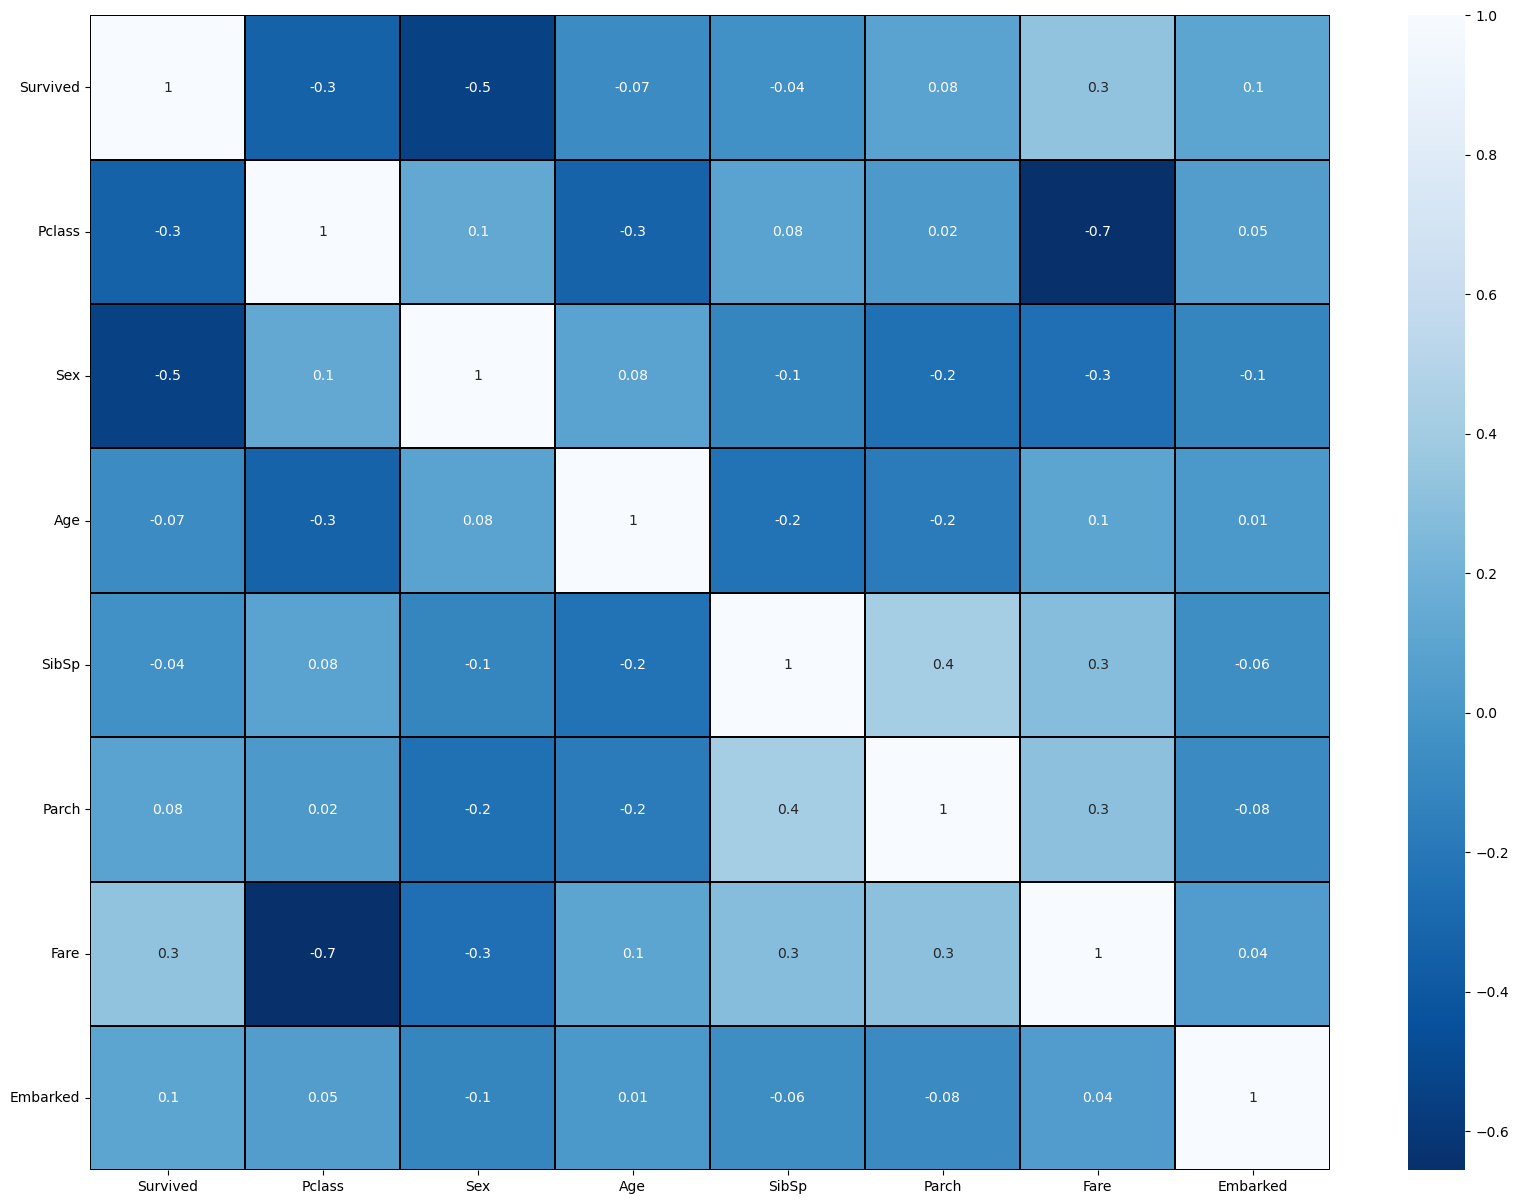

In [45]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(),linewidths=0.1,fmt='.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

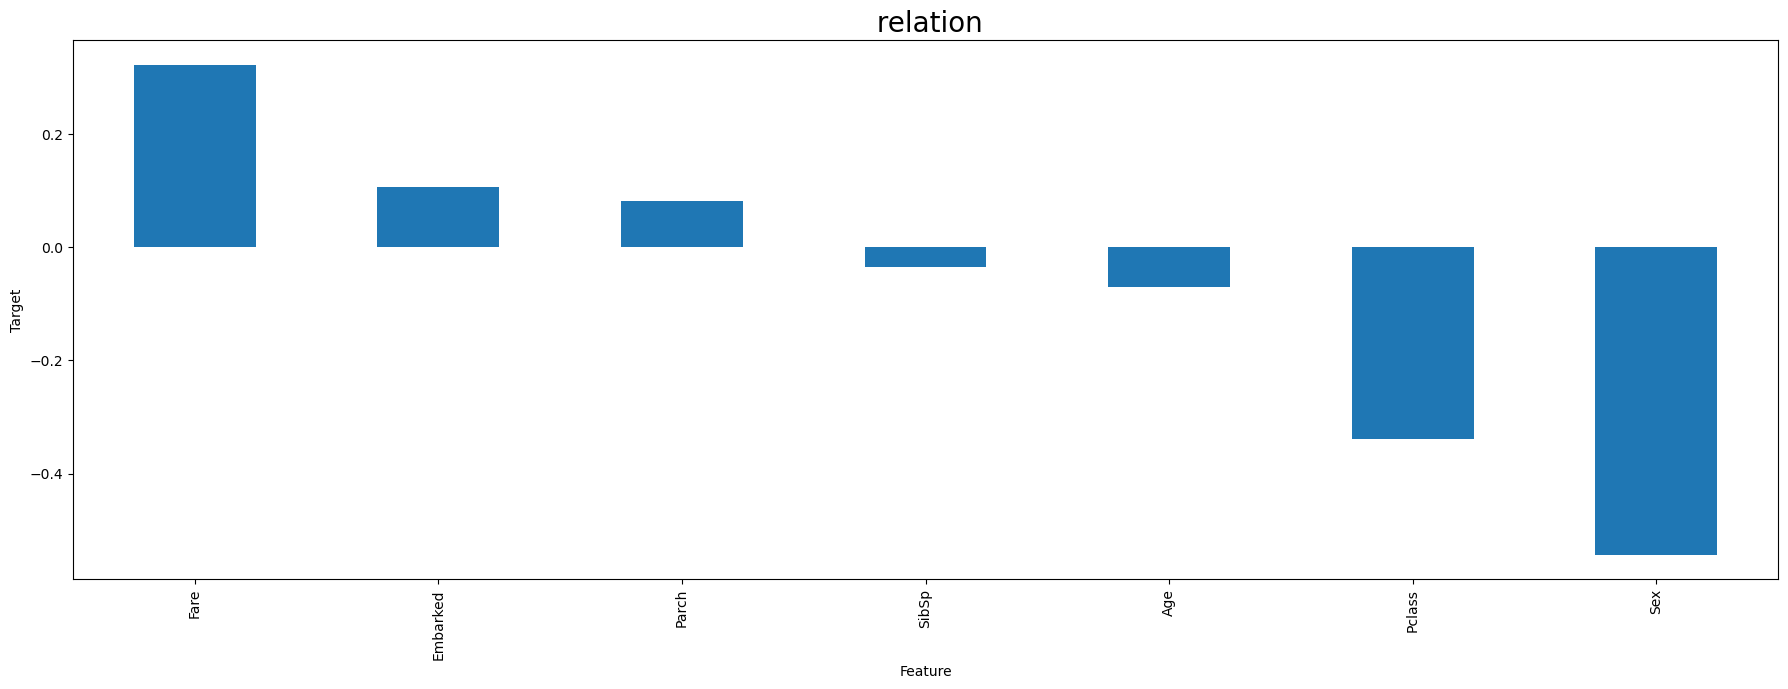

In [46]:
plt.figure(figsize=(22,7))
data.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

# over sampling

In [47]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [48]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [49]:
y1.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

# Machine learning

In [50]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,5.059104,Pclass
1,3.080632,Sex
2,4.314358,Age
3,1.562259,SibSp
4,1.621532,Parch
5,1.722271,Fare
6,1.389582,Embarked


In [52]:
x.shape

(891, 7)

In [53]:
y.unique()

array([0, 1], dtype=int64)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [55]:
print(x_test.shape,x_test.shape,y_test.shape,y_test.shape)

(179, 7) (179, 7) (179,) (179,)


In [56]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [57]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [58]:
value.score(x_train,y_train)

0.9058988764044944

In [59]:
value.score(x_test,y_test)

0.8268156424581006

In [60]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acc[key]=accuracy_score(y_test, value)
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
    'Accuracy':acc,
})

print("\n details for each model:")
print(details)

best_model =max(acc, key=acc.get) and  min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


 details for each model:
          MAE       MSE  R-squared      RMSE  Accuracy
dt   0.251397  0.251397  -0.050469  0.501395  0.748603
rf   0.195531  0.195531   0.182968  0.442189  0.804469
lgR  0.217877  0.217877   0.089593  0.466773  0.782123
nb   0.245810  0.245810  -0.027126  0.495792  0.754190
svm  0.245810  0.245810  -0.027126  0.495792  0.754190
knn  0.268156  0.268156  -0.120501  0.517838  0.731844
bg   0.212291  0.212291   0.112937  0.460750  0.787709
etc  0.212291  0.212291   0.112937  0.460750  0.787709
gb   0.173184  0.173184   0.276343  0.416154  0.826816

Best Model based on RMSE: gb


# cross validation score

In [61]:
cvs = {}
diff = {}

for key, value in model.items():
    value.fit(x1, y1)
    y_pred = value.predict(x_test)

    cvs[key] = cross_val_score(value, x1, y1, cv=5).mean()
    diff[key] = accuracy_score(y_test, y_pred) - cvs[key]

print("Cross-Validation Scores:")
print(cvs)
print("Difference between Accuracy and Cross-Validation Mean:")
print(diff)

Cross-Validation Scores:
{'dt': 0.8261394769613947, 'rf': 0.8425238688252387, 'lgR': 0.8024740556247407, 'nb': 0.7915483603154836, 'svm': 0.796085512660855, 'knn': 0.7751432129514321, 'bg': 0.845280199252802, 'etc': 0.834337899543379, 'gb': 0.8479908675799086}
Difference between Accuracy and Cross-Validation Mean:
{'dt': 0.13475437778720867, 'rf': 0.13512976245967756, 'lgR': -0.003591374060494923, 'nb': -0.03735841618140534, 'svm': -0.04189556852677678, 'knn': 0.06284561386421039, 'bg': 0.13237343203211427, 'etc': 0.12655595520522434, 'gb': 0.012344327950817635}


In [62]:
final_model = GradientBoostingClassifier()
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 82.68%


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       108
           1       0.82      0.72      0.77        71

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [64]:
print(confusion_matrix(y_test,y_pred))

[[97 11]
 [20 51]]


# ROC  

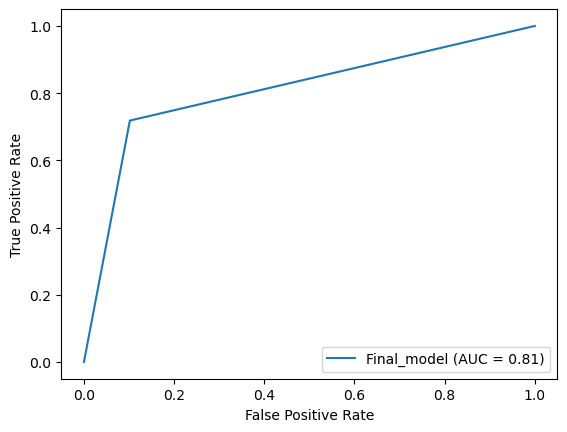

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

roc_display.plot()
plt.show()

# saving the model

In [ ]:
import joblib
joblib.dump(final_model,"titanic_sur")

In [ ]:
Model=joblib.load("titanic_sur")

In [67]:
prediction=final_model.predict(x_test) 
prediction

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [ ]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df


In [75]:
x.tail(4)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
887,1,0,19.0,0,0,30.00,0
888,3,0,30.0,1,2,23.45,0
889,1,1,26.0,0,0,30.00,1
890,3,1,32.0,0,0,7.75,2


In [76]:
y.tail(4)

887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [82]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

prediction for index 889

In [80]:
print('Survived',model['gb'].predict(scaler.transform([[1,1,26.0,0,0,30.00,1,]])))

Survived [1]


prediction for index 888

In [85]:
print('Survived',model['gb'].predict(scaler.transform([[3,0,30.0,1,2,23.45,0,]])))


Survived [0]


In [87]:
predictions = {}
Pclass= int(input("Please enter Passenger Class  "))
Sex= int(input("Please enter gender, 0 for female , 1 for male "))
Age= float(input("Please enter age "))
SibSp= int(input("Please enter Number of Siblings/Spouses Aboard from 0 to 5 "))
Parch= int(input("Please enter Number of Parents/Children Aboard "))
Fare= float(input("Please enter fare amount with 2 decimal points "))
emb= int(input("Please enter Port of Embarkation  0,1or 2 "))

user_input = [[Pclass,Sex,Age,SibSp,Parch,Fare,emb]]
scaled_input = scaler.transform(user_input)
prediction = model['gb'].predict(scaled_input)

print('Survived:', prediction[0])


Please enter Pclass 3
Please enter gender, 0 for female , 1 for male0
Please enter age 30.0
Please enter sibsp from 0 to 5 1
Please enter parch2
Please enter fare amount with 2 decimal points 23.45
Please enter embarked 0,1or 2 0
Survived: 0
